## 0. Install

In [ ]:
# !pip install mediapipe-silicon opencv-python pandas scikit-learn

## 1. Import Dependencies

In [45]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

## 2. Capture Landmarks and Export CSV

#### 2_1. Import Dependencies

In [2]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

#### 2_2. Capture Landmarks

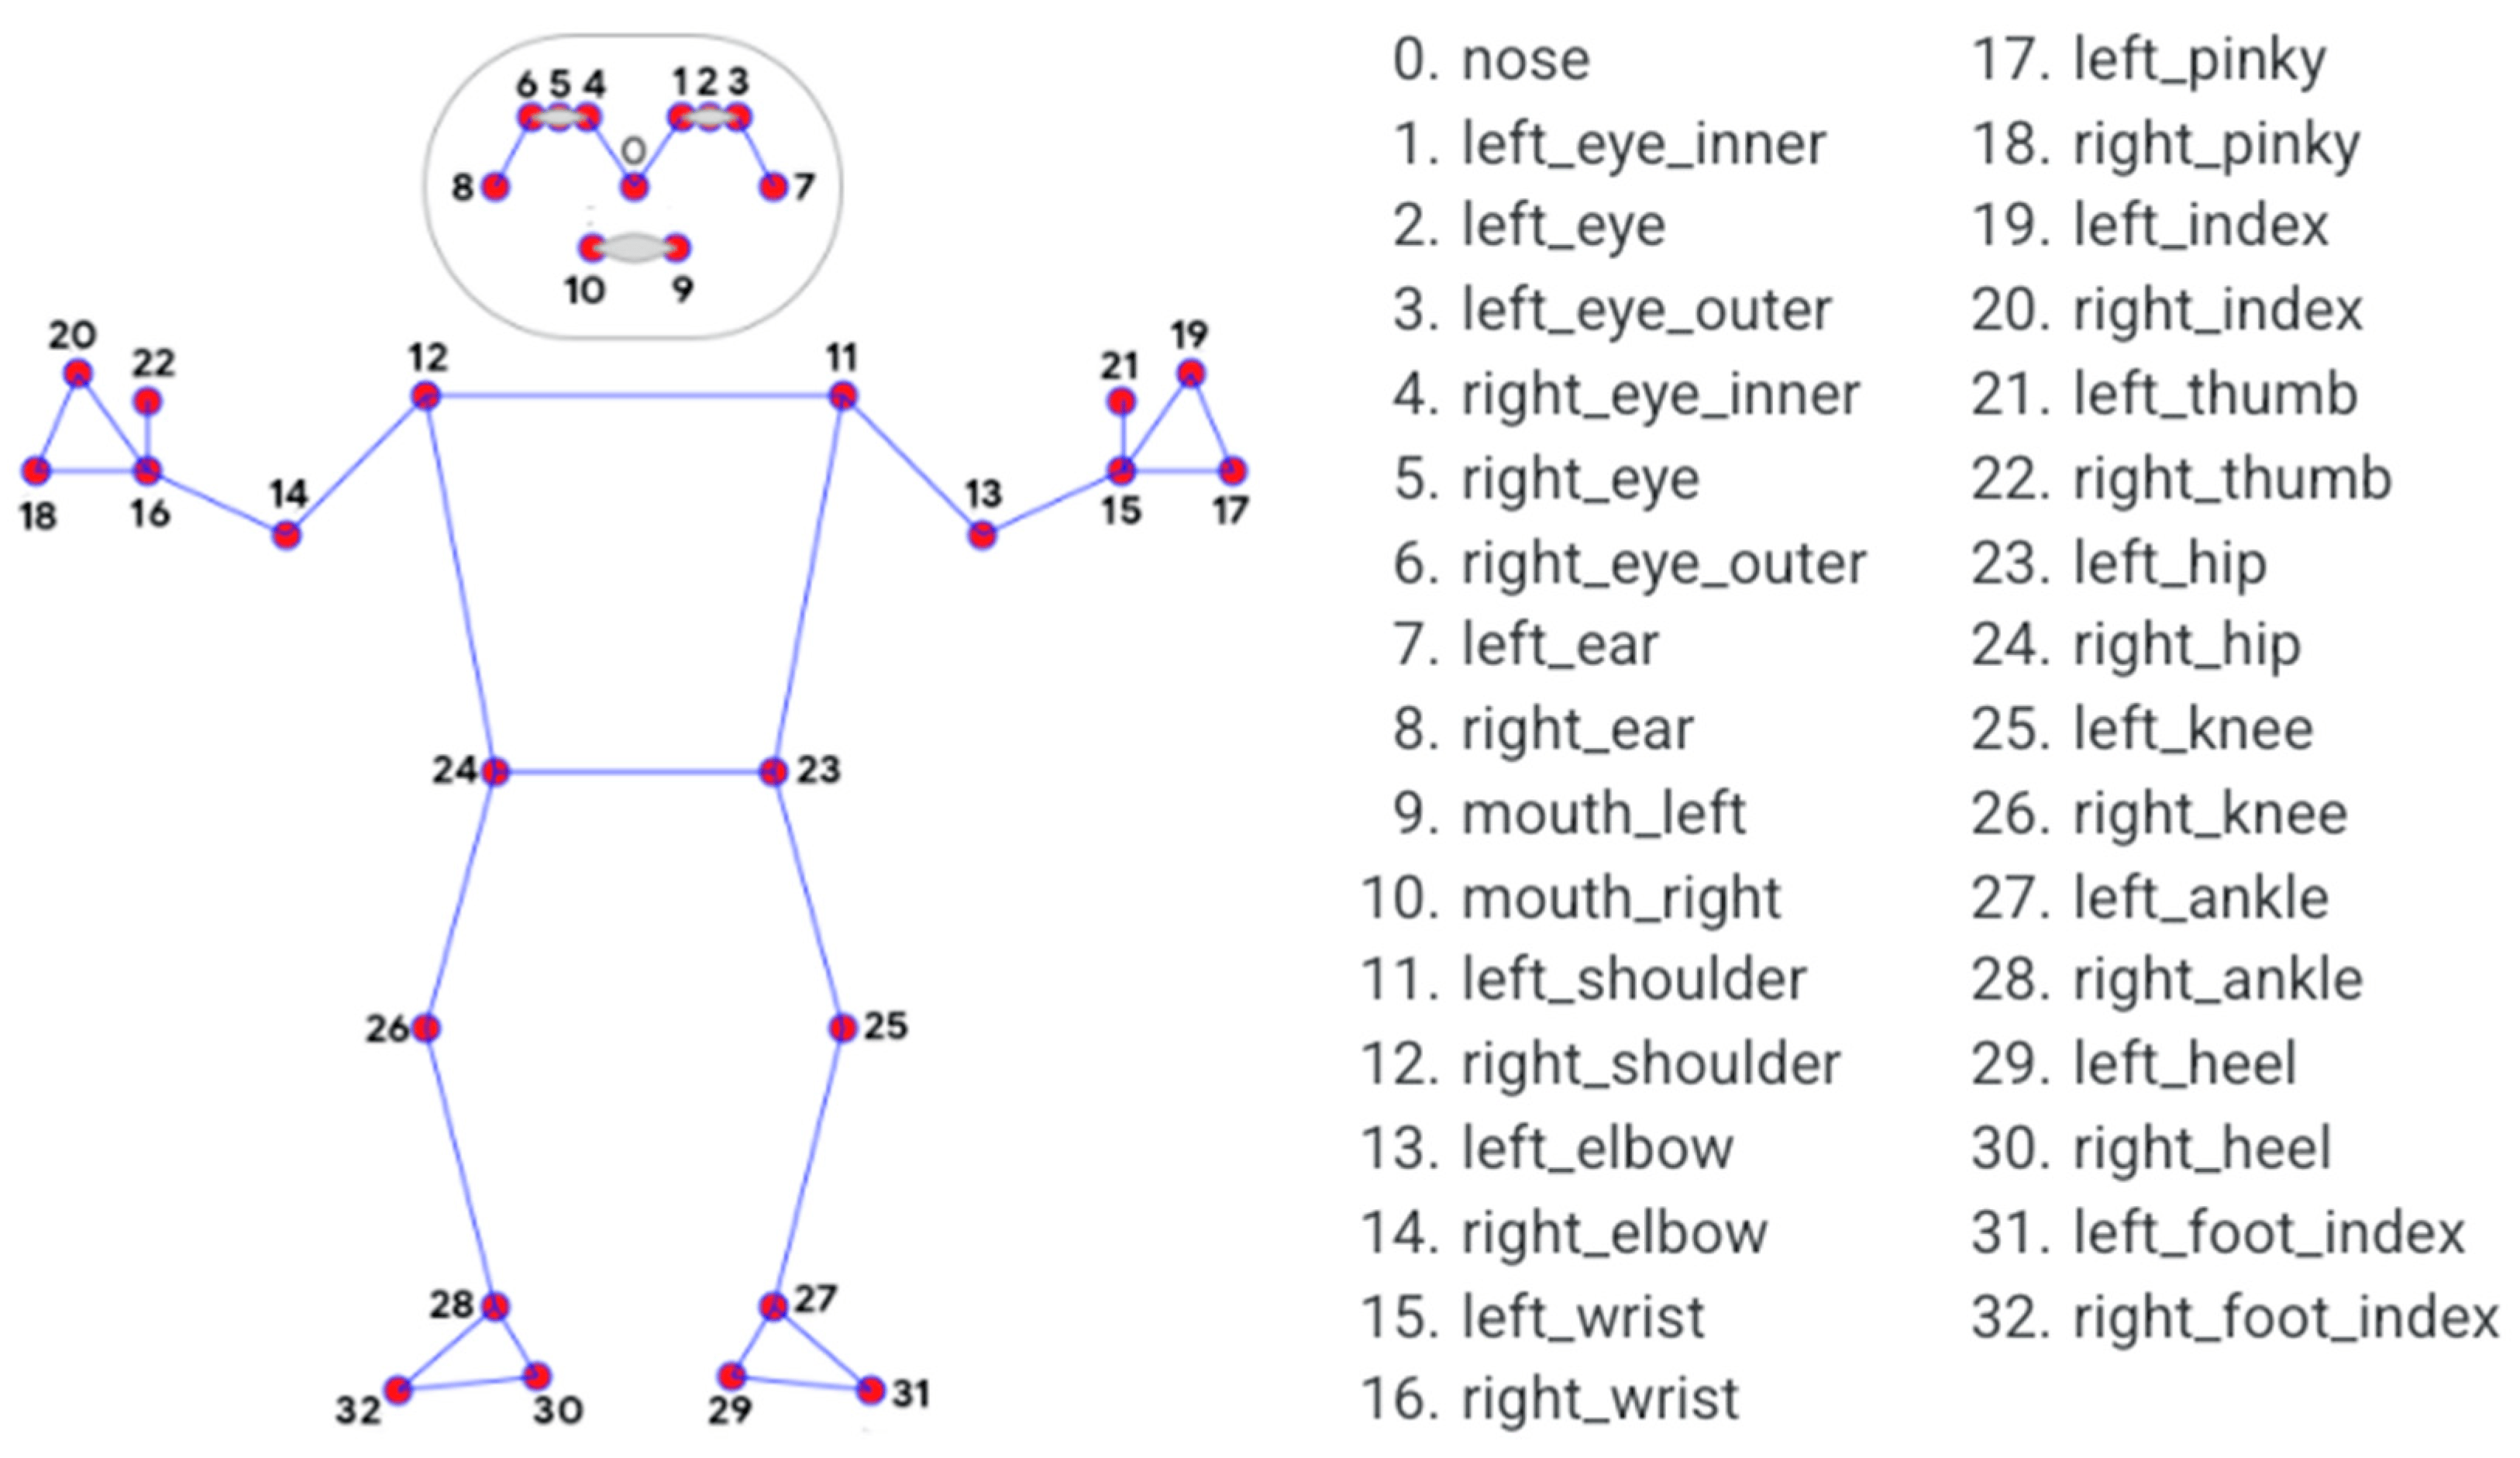

In [3]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += [f'x{val}', f'y{val}', f'z{val}', f'v{val}']

In [4]:
with open('deadlift_coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [5]:
def export_landmark(results, action):
    try:
        keypoints = [action] + [coord for res in results.pose_landmarks.landmark for coord in [res.x, res.y, res.z, res.visibility]]
        
        with open('deadlift_coords.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass

### 데드리프트 라벨링

In [35]:
# Deadlift Correct Posture
cap = cv2.VideoCapture('./resources/videos/deadlift/deadlift13.MOV')

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, image = cap.read()
        
        if not ret:
            break

        width = 720
        height = 1280
        image = cv2.resize(image, (width, height)) # 영상 크기 조절

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        k = cv2.waitKey(1)
        if k == ord('u'): # u: up
            export_landmark(results, 'd_correct_up') # 올바른 자세 up
            print('올바른 자세 up')
        if k == ord('d'): # d: down
            export_landmark(results, 'd_correct_down') #올바른 자세 down
            print('올바른 자세 down')
            
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down
올바른 자세 down


-1

In [28]:
# Deadlift Incorrect Posture 1 - Spine Neutral
cap = cv2.VideoCapture('./resources/videos/deadlift/deadlift14.MOV')

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, image = cap.read()
        
        if not ret:
            break

        width = 720
        height = 1280
        image = cv2.resize(image, (width, height))
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        k = cv2.waitKey(1)
        if k == ord('u'): # u: up
            export_landmark(results, 'd_spine_neutral_up') # 척추 중립이 아닌 자세 up
            print('척추 중립이 아닌 자세 up')
        if k == ord('d'): # d: down
            export_landmark(results, 'd_spine_neutral_down') # 척추 중립이 아닌 자세 down
            print('척추 중립이 아닌 자세 down')
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 down
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 up
척추 중립이 아닌 자세 d

-1

In [38]:
# Deadlift Incorrect Posture 2 - Arms Spread
cap = cv2.VideoCapture('./resources/videos/deadlift/deadlift15.MOV')

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, image = cap.read()
        
        if not ret:
            break

        width = 720
        height = 1280
        image = cv2.resize(image, (width, height))
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        k = cv2.waitKey(1)
        if k == ord('u'): # u: up
            export_landmark(results, 'd_arms_spread_up') # 바를 너무 넓게 잡은 자세 up
            print('바를 너무 넓게 잡은 자세 up')
        if k == ord('d'): # d: down
            export_landmark(results, 'd_arms_spread_down') # 바를 너무 넓게 잡은 자세 down
            print('바를 너무 넓게 잡은 자세 down')
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down
바를 너무 넓게 잡은 자세 down


-1

In [41]:
# Deadlift Incorrect Posture 3 - Arms Narrow
cap = cv2.VideoCapture('./resources/videos/deadlift/deadlift16.MOV')

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    while cap.isOpened():
        ret, image = cap.read()
        
        if not ret:
            break
        
        width = 720
        height = 1280
        image = cv2.resize(image, (width, height))
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        k = cv2.waitKey(1)
        if k == ord('u'): # u: up
            export_landmark(results, 'd_arms_narrow_up') # 바를 너무 넓게 잡은 자세 up
            print('바를 너무 좁게 잡은 자세 up')
        if k == ord('d'): # d: down
            export_landmark(results, 'd_arms_narrow_down') # 바를 너무 넓게 잡은 자세 down
            print('바를 너무 좁게 잡은 자세 down')
        
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down
바를 너무 좁게 잡은 자세 down


-1

## 라벨링된 결과 시각화

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
deadlift = pd.read_csv('./deadlift_coords.csv')
deadlift.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,d_correct_down,0.592055,0.387002,0.761125,0.976802,0.585143,0.381295,0.735319,0.980862,0.582941,...,0.491055,0.909689,0.588401,0.644509,0.169380,0.901291,0.728158,0.618136,0.480577,0.840292
1,d_correct_down,0.587373,0.376647,0.683136,0.983089,0.581771,0.369854,0.658460,0.985313,0.579841,...,0.409666,0.857568,0.582093,0.645119,0.139664,0.876760,0.694696,0.614433,0.398222,0.798012
2,d_correct_down,0.603379,0.289000,0.876913,0.977582,0.599490,0.280128,0.851040,0.982493,0.597362,...,0.369821,0.913276,0.565828,0.635022,0.151700,0.870137,0.743687,0.628615,0.331195,0.832618
3,d_correct_up,0.704687,0.148774,0.440767,0.995209,0.700908,0.139350,0.365987,0.995613,0.695389,...,0.370875,0.964271,0.582262,0.644630,0.042322,0.923103,0.750335,0.640705,0.323895,0.838903
4,d_correct_up,0.716225,0.146869,0.293682,0.998649,0.713821,0.136261,0.216470,0.998652,0.709841,...,0.414867,0.955359,0.579698,0.642973,0.006126,0.938232,0.745315,0.636252,0.365578,0.844092


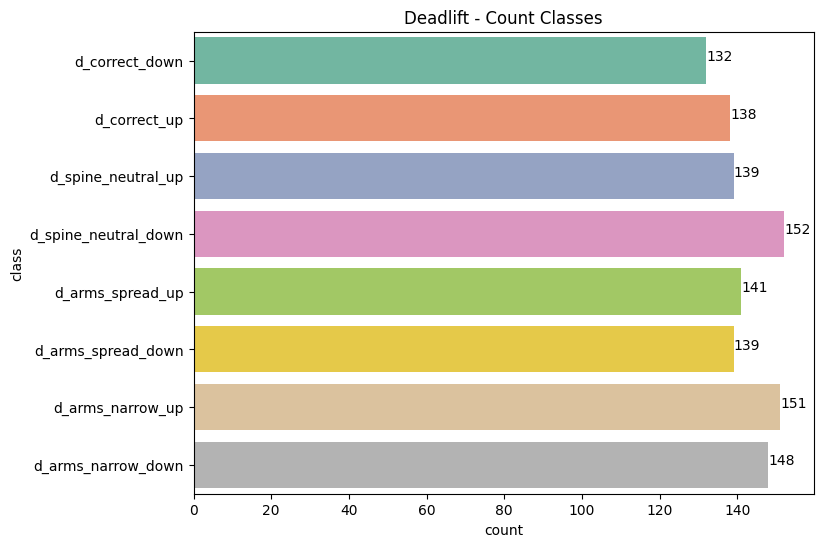

counts: 1140


In [48]:
plt.figure(figsize=(8, 6))
plt.title('Deadlift - Count Classes')

ax = sns.countplot(y=deadlift['class'], palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width() + 0.1, p.get_y() + 0.4))

plt.show()
print(f'counts: {len(deadlift["class"])}')